# **CUSTOMER CHURN IN BANKING** - NOTEBOOK 1: EDA

### Initial setup

In [35]:
#libraries import and dataset load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('../data/raw/dataset1.csv', sep = ',')

### Raw dataset visualitation

In [36]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [38]:
df.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [39]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [40]:
(df.isnull().sum()/len(df))

RowNumber             0.0
CustomerId            0.0
Surname               0.0
CreditScore           0.0
Geography             0.0
Gender                0.0
Age                   0.0
Tenure                0.0
Balance               0.0
NumOfProducts         0.0
HasCrCard             0.0
IsActiveMember        0.0
EstimatedSalary       0.0
Exited                0.0
Complain              0.0
Satisfaction Score    0.0
Card Type             0.0
Point Earned          0.0
dtype: float64

### Identifying actions by correlation

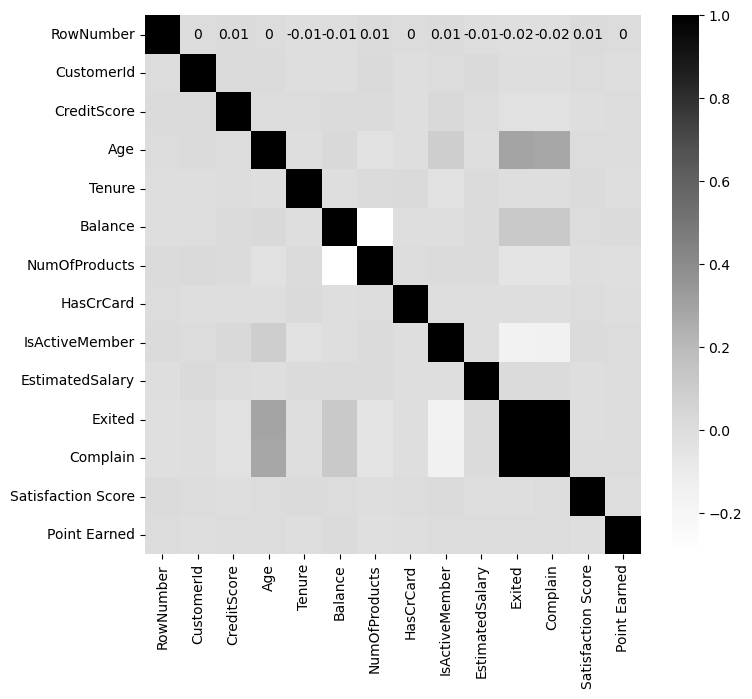

In [41]:
# creating a correlation for the variables
# only numeric columns
numeric_data = df.select_dtypes(include=['number'])

# correlation matrix
corr = numeric_data.corr().round(2)

plt.figure(figsize=(8, 7))
sns.heatmap(corr, annot=True, cmap='Greys', cbar=True, annot_kws={"color": "black"})

plt.show()

Comments:

- Age & Exited: Notable correlation, older customers might be more likely to exit
- Balance & number of products: moderate correlation, customers with a higher balance tend to have more products
- Exited & complain: Significant correlation, customers who complain are more likely to exit.

How can we avoid the customer churn (exited)?

## UNIVARIATE ANALYSIS

#### Bar Charts

<Axes: title={'center': 'Variable Card Type'}, xlabel='Card Type', ylabel='count'>

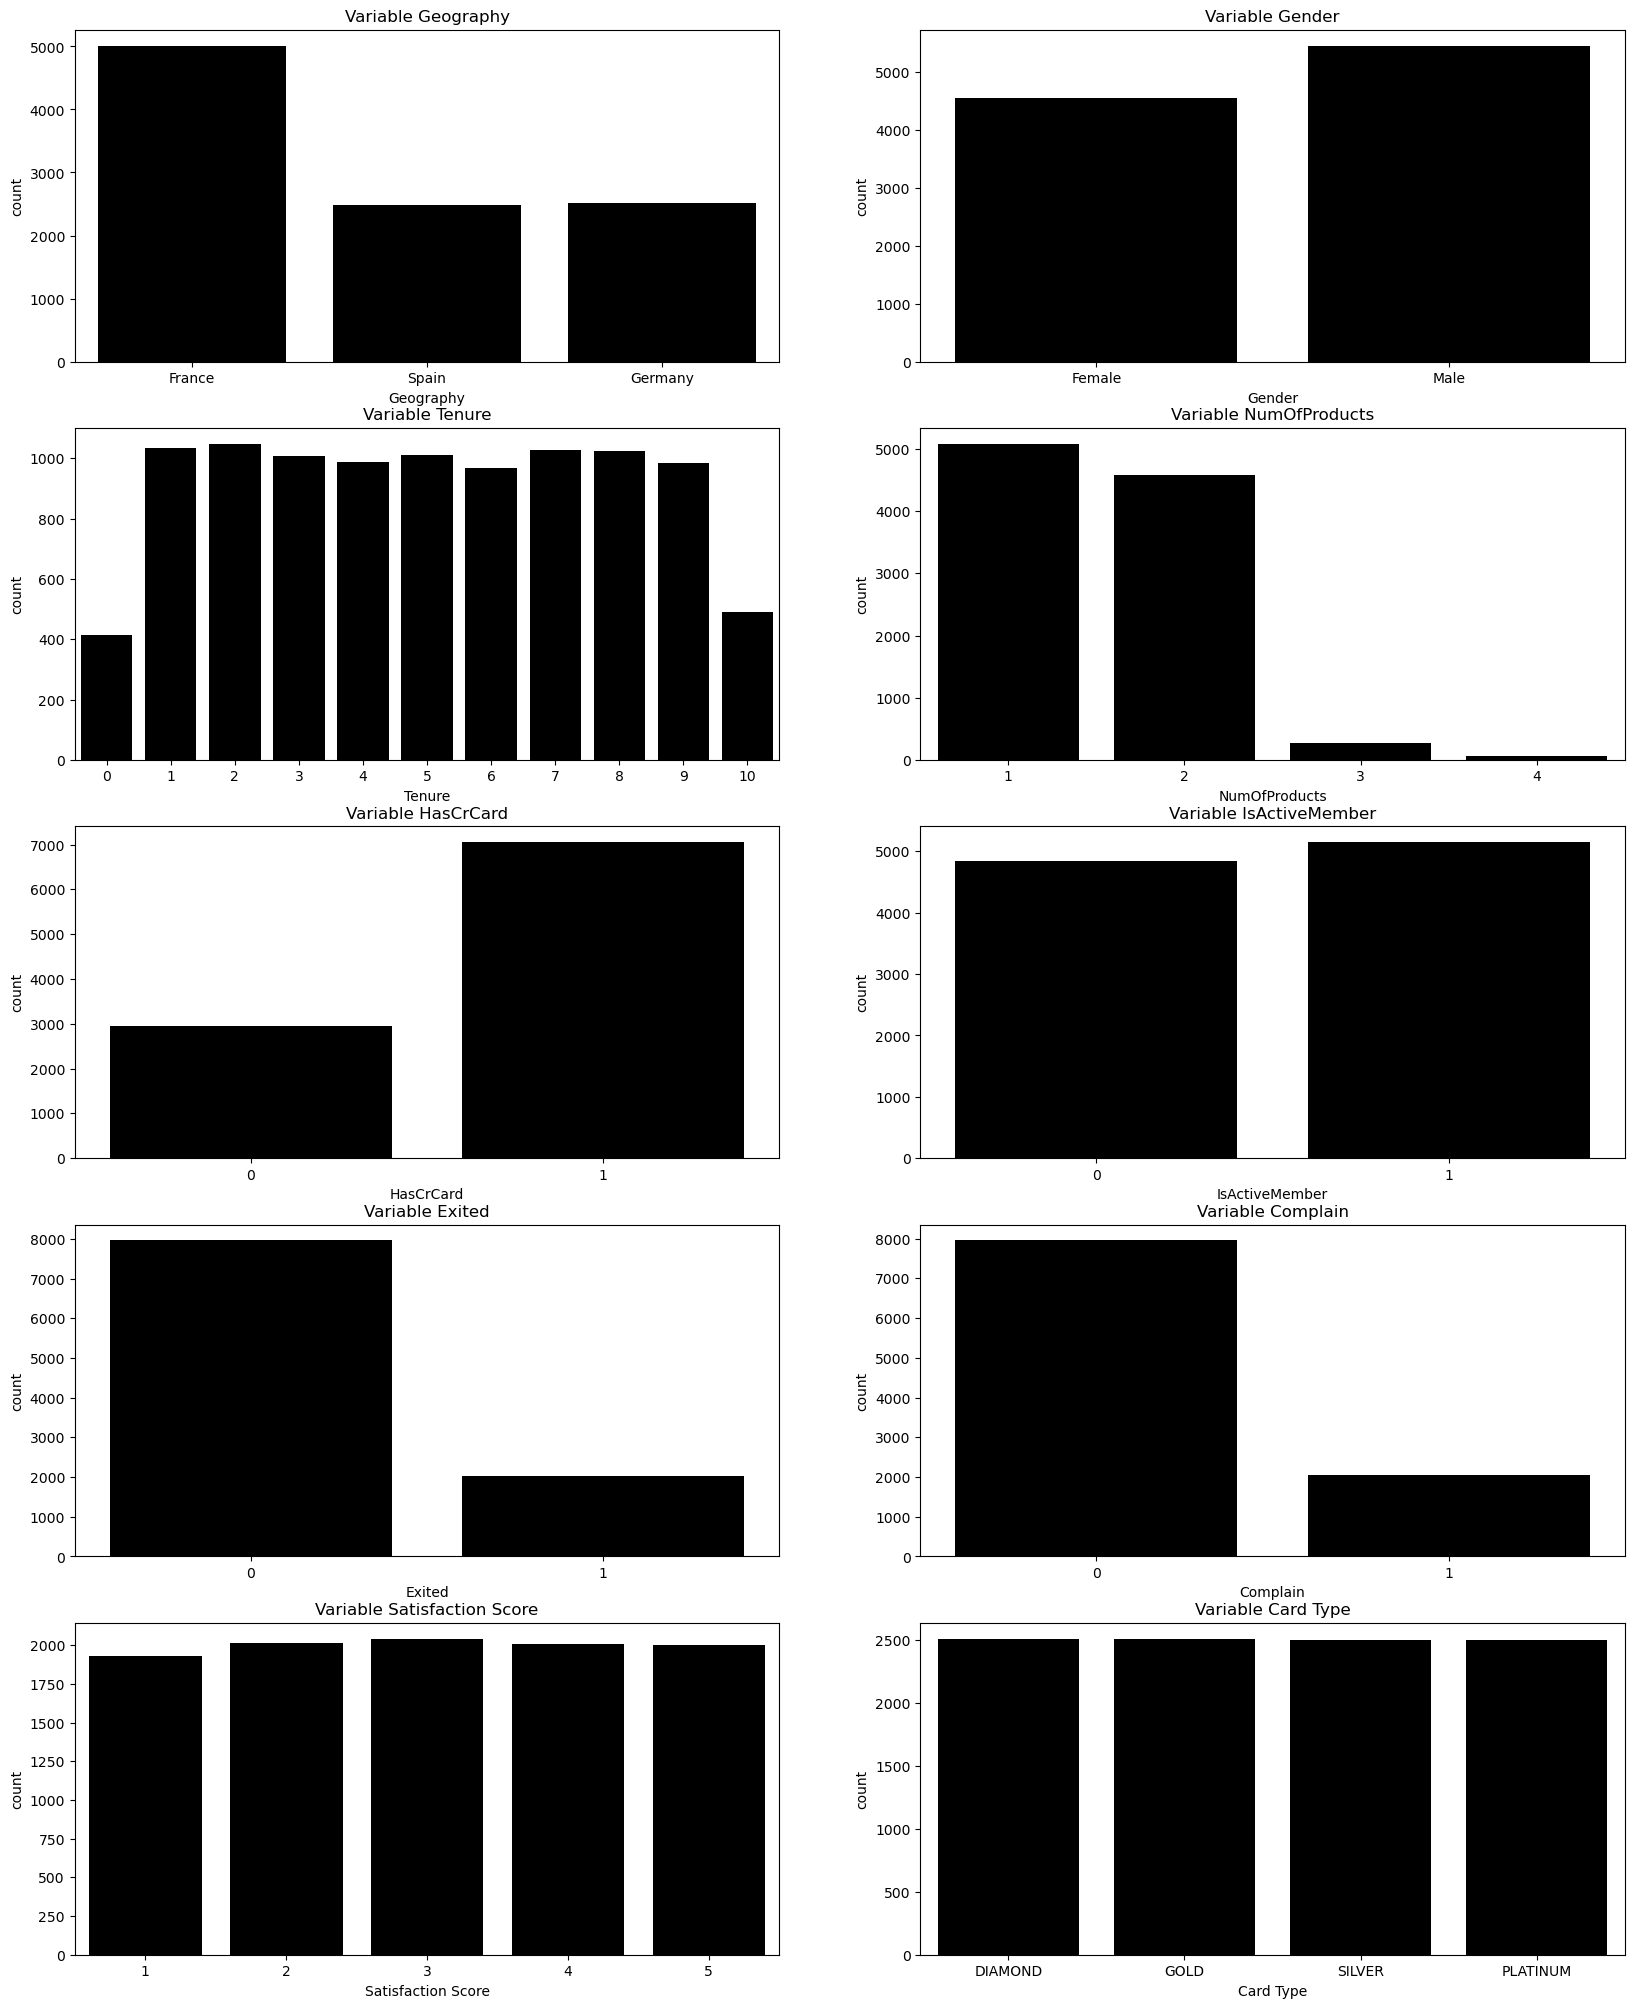

In [42]:
plt.figure(figsize = (20, 25))

plt.subplot(5, 2, 1)
plt.gca().set_title('Variable Geography')
sns.countplot(x = 'Geography', color = 'Black', data = df)

plt.subplot(5, 2, 2)
plt.gca().set_title('Variable Gender')
sns.countplot(x = 'Gender', color = 'Black', data = df)

plt.subplot(5, 2, 3)
plt.gca().set_title('Variable Tenure')
sns.countplot(x = 'Tenure', color = 'Black', data = df)

plt.subplot(5, 2, 4)
plt.gca().set_title('Variable NumOfProducts')
sns.countplot(x = 'NumOfProducts', color = 'Black', data = df)

plt.subplot(5, 2, 5)
plt.gca().set_title('Variable HasCrCard')
sns.countplot(x = 'HasCrCard', color = 'Black', data = df)

plt.subplot(5, 2, 6)
plt.gca().set_title('Variable IsActiveMember')
sns.countplot(x = 'IsActiveMember', color = 'Black', data = df)

plt.subplot(5, 2, 7)
plt.gca().set_title('Variable Exited')
sns.countplot(x = 'Exited', color = 'Black', data = df)

plt.subplot(5, 2, 8)
plt.gca().set_title('Variable Complain')
sns.countplot(x = 'Complain', color = 'Black', data = df)

plt.subplot(5, 2, 9)
plt.gca().set_title('Variable Satisfaction Score')
sns.countplot(x = 'Satisfaction Score', color = 'Black', data = df)

plt.subplot(5, 2, 10)
plt.gca().set_title('Variable Card Type')
sns.countplot(x = 'Card Type', color = 'Black', data = df)

Comments:
* **Geography**: Customers mostly from France.
* **Gender**: Normal distribution, sightly more males than females.
* **Tenure**: Balanced distribution, with a drop in the 10th year.
* **Number of Products**: Most of the customers have 1 or 2 products, only few have more.
* **Has Credit Card**: Most of the customers have a creadit card.
* **Is Active Member**: Almost half of the customers are not active.
* **Exited**: Aprox 20% of customers exited.
* **Complain**: Aprox 20% of customers exited, direct correlation with exited as showed before in the correlaion map.
* **Satisfaction Score**: Homogenic distribution around 1-5 scores. This is not good, many customers are not satisfied (1-3 represents 60% of customers).
* **Card Type**: Homogenic distribution across plans.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

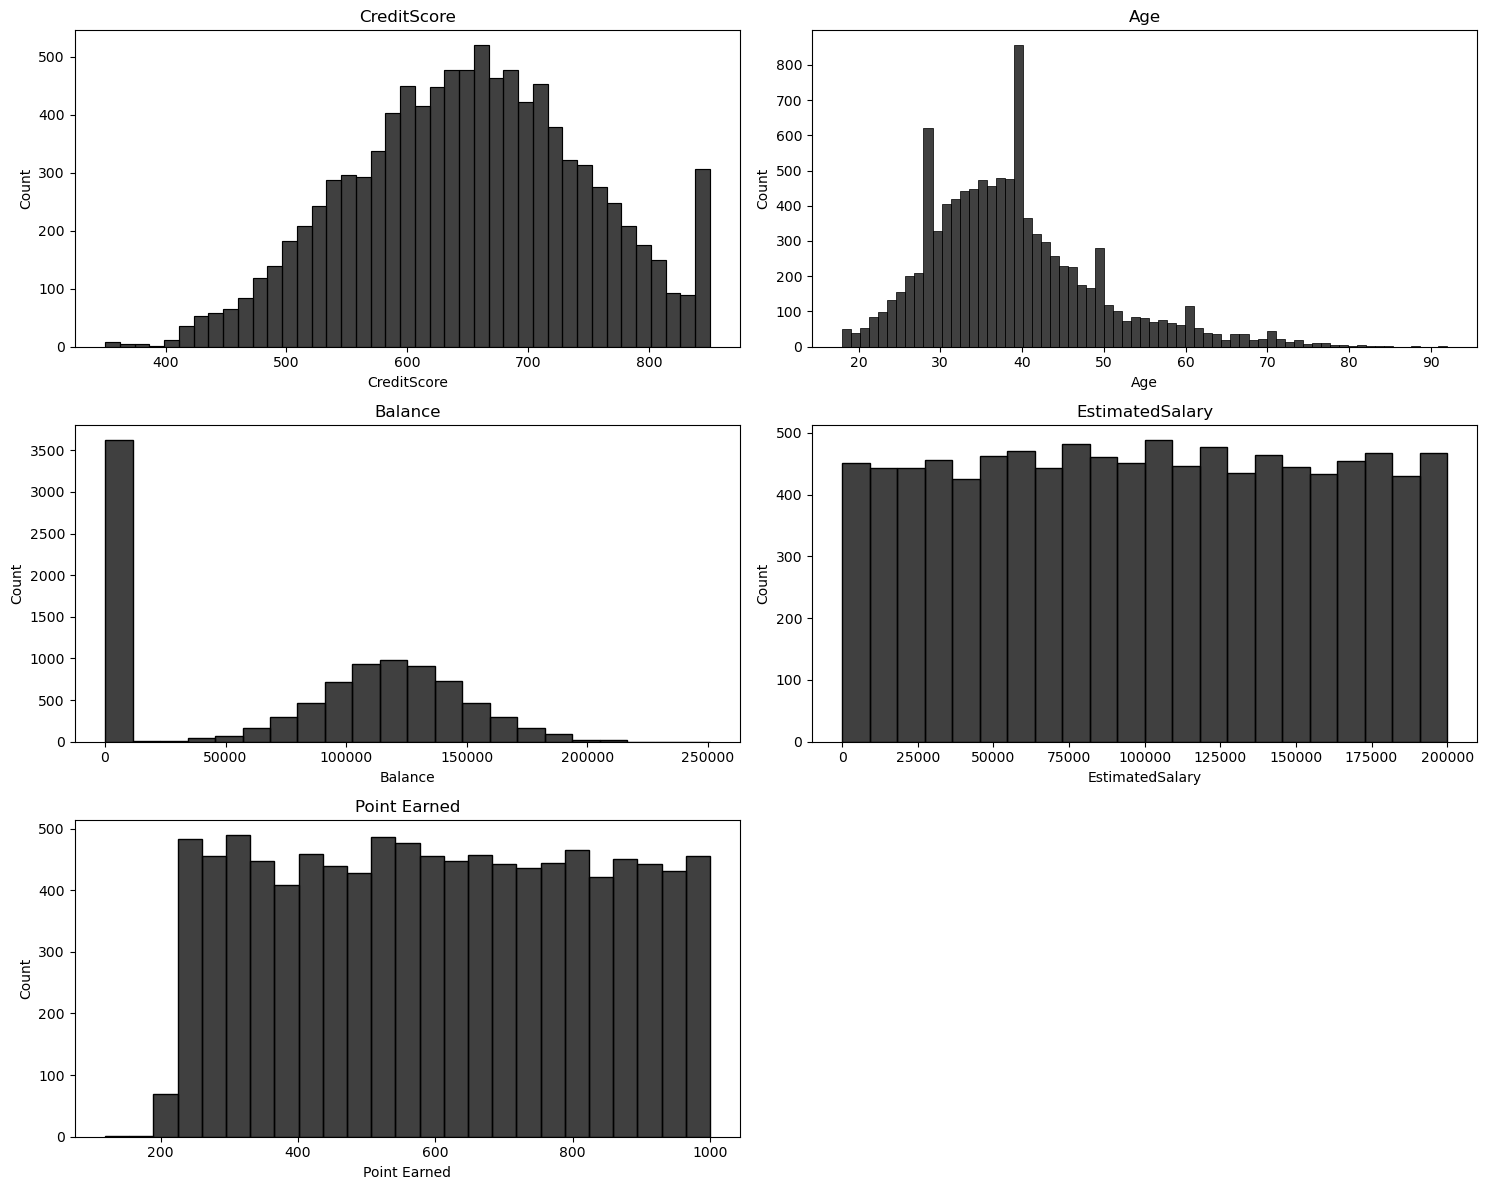

In [43]:
plt.figure(figsize=(15, 12))

plt.subplot(3, 2, 1)
sns.histplot(x=df['CreditScore'], kde=False, color='black')
plt.title('CreditScore')

plt.subplot(3, 2, 2)
sns.histplot(x=df['Age'], kde=False, color='black')
plt.title('Age')

plt.subplot(3, 2, 3)
sns.histplot(x=df['Balance'], kde=False, color='black')
plt.title('Balance')

plt.subplot(3, 2, 4)
sns.histplot(x=df['EstimatedSalary'], kde=False, color='black')
plt.title('EstimatedSalary')

plt.subplot(3, 2, 5)
sns.histplot(x=df['Point Earned'], kde=False, color='black')
plt.title('Point Earned')

plt.tight_layout()
plt.show()

Continuous visualitations analysis:
* **Credit Score**: Normal distribution, with a light skew in the right. Most customers between 600 & 700 Credit Score.
* **Age**: Bimodal pattern (2 peaks around ages 28 and 40). Most customers between 28-50 years.
* **Balance**: Normal distribution, except of the peak on 0 (inactive accounts).
* **Estimated Salary**: Uniform distribution, no signiffican peaks of valleys.
* **Point Earned**: Uniform distribution, no signiffican peaks of valleys.

#### Boxplots

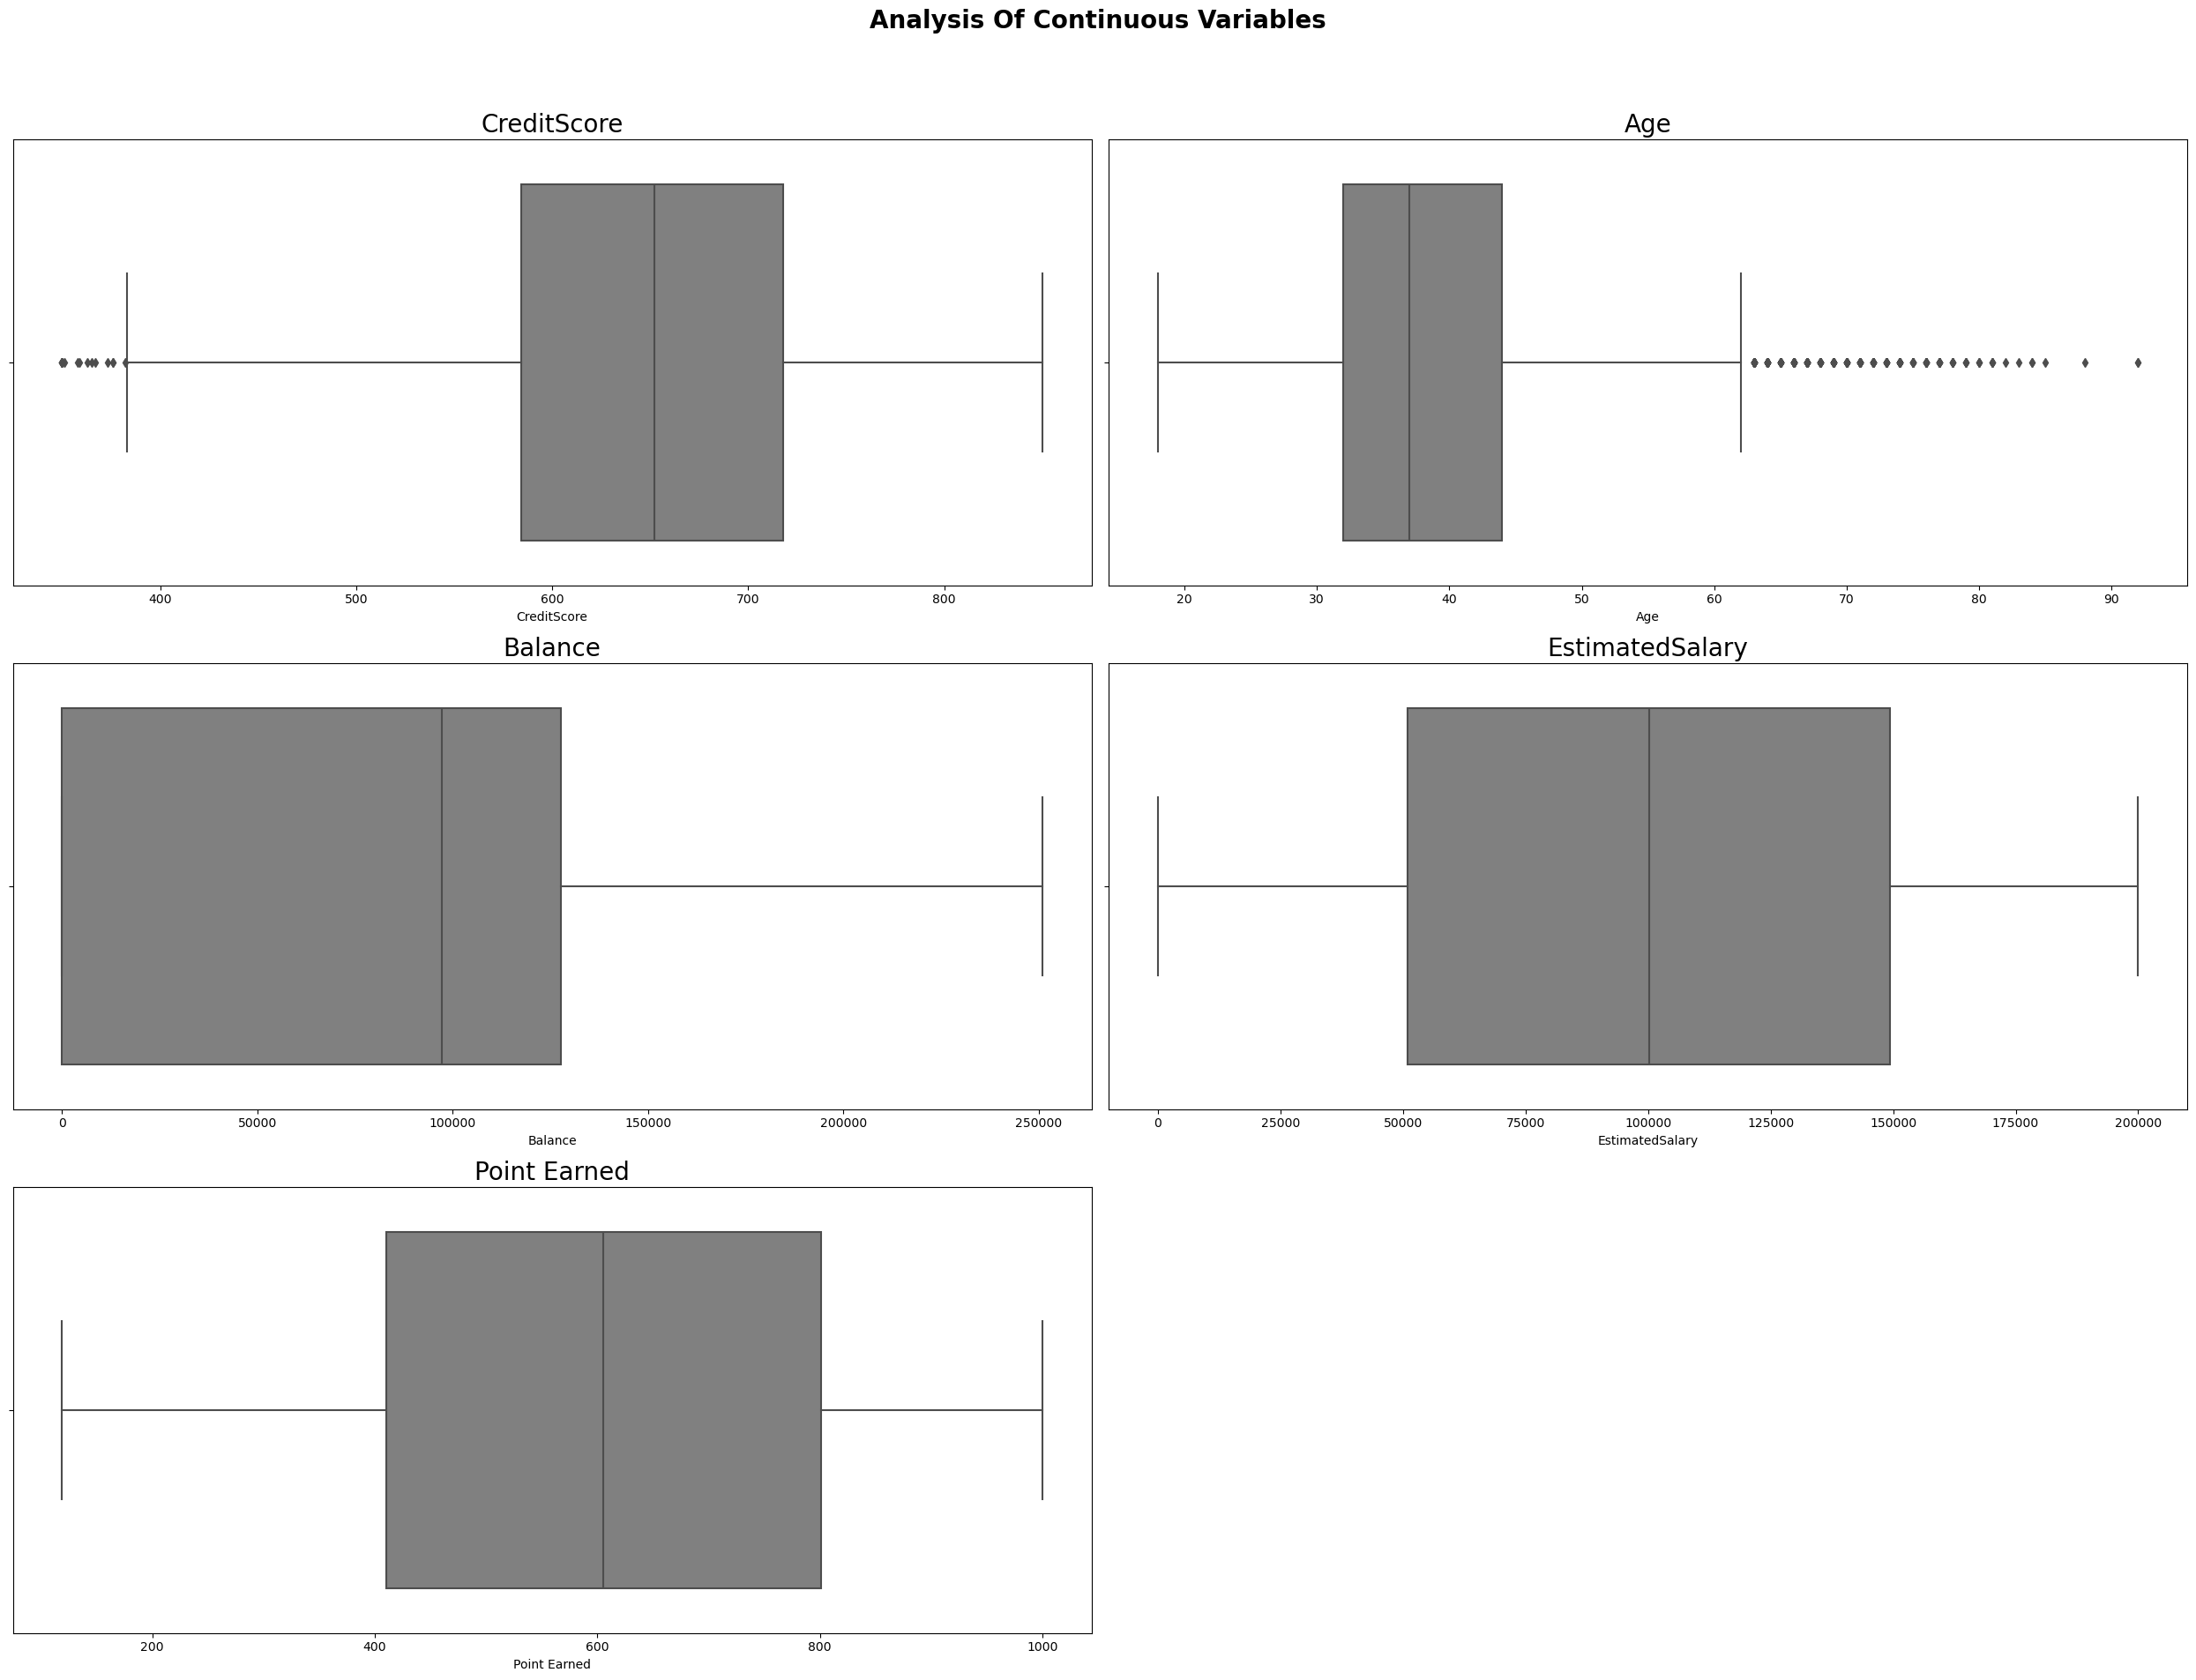

In [44]:
plt.figure(figsize=(25, 20))
plt.suptitle("Analysis Of Continuous Variables", fontweight="bold", fontsize=20)

plt.subplot(3, 2, 1)
plt.title("CreditScore", fontdict = {'fontsize': 20})
sns.boxplot(x=df["CreditScore"], color='grey')

plt.subplot(3, 2, 2)
plt.title("Age", fontdict = {'fontsize': 20})
sns.boxplot(x=df["Age"], color='grey')

plt.subplot(3, 2, 3)
plt.title("Balance", fontdict = {'fontsize': 20})
sns.boxplot(x=df["Balance"], color='grey')

plt.subplot(3, 2, 4)
plt.title("EstimatedSalary", fontdict = {'fontsize': 20})
sns.boxplot(x=df["EstimatedSalary"], color='grey')

plt.subplot(3, 2, 5)
plt.title("Point Earned", fontdict = {'fontsize': 20})
sns.boxplot(x=df["Point Earned"], color='grey')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

COMMENT: I dont find any outliers that can put in risk the quality of the data

## BIVARIATE ANALYSIS (vs. 'Exited')

Targetting 'EXITED' and complaring it tot he rest of variables

#### Bar Charts

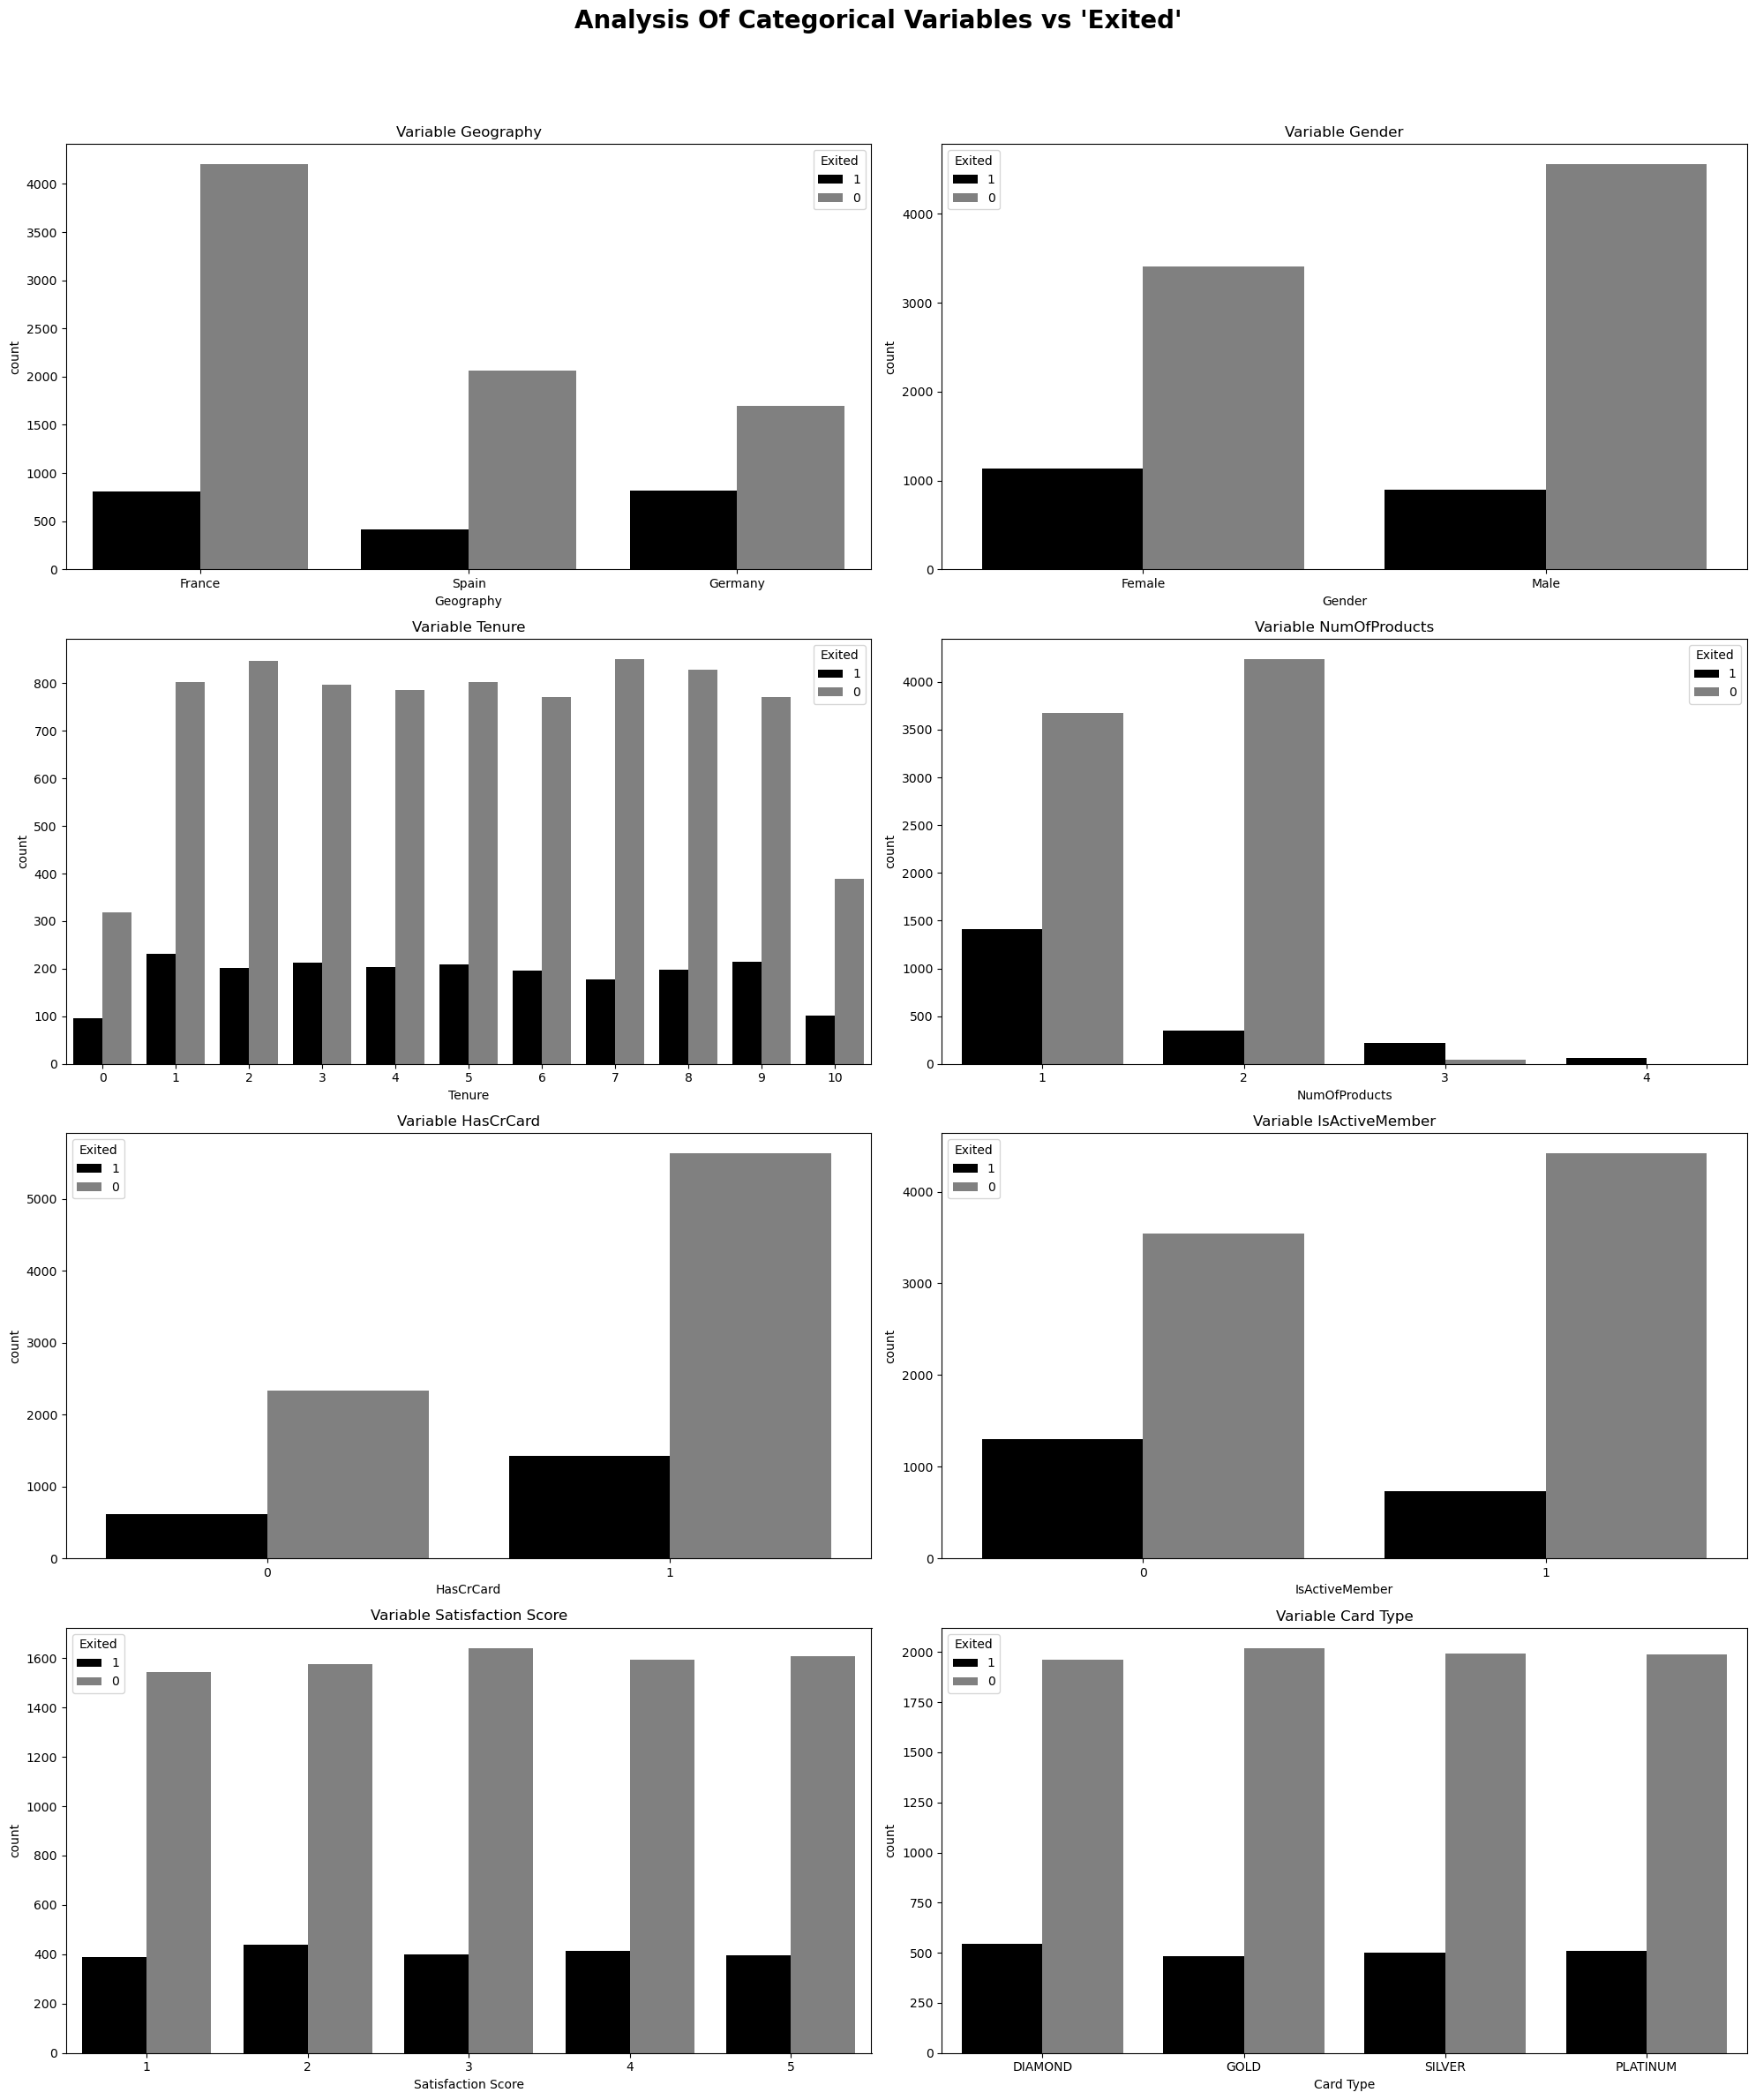

In [45]:
# Convert the 'Exited' column to string to avoid the legend issue
df['Exited'] = df['Exited'].astype(str)

plt.figure(figsize=(20, 25))
plt.suptitle("Analysis Of Categorical Variables vs 'Exited'", fontweight="bold", fontsize=20)

plt.subplot(4, 2, 1)
plt.gca().set_title('Variable Geography')
sns.countplot(x='Geography', hue='Exited', data=df, palette=['black', 'gray'])

plt.subplot(4, 2, 2)
plt.gca().set_title('Variable Gender')
sns.countplot(x='Gender', hue='Exited', data=df, palette=['black', 'gray'])

plt.subplot(4, 2, 3)
plt.gca().set_title('Variable Tenure')
sns.countplot(x='Tenure', hue='Exited', data=df, palette=['black', 'gray'])

plt.subplot(4, 2, 4)
plt.gca().set_title('Variable NumOfProducts')
sns.countplot(x='NumOfProducts', hue='Exited', data=df, palette=['black', 'gray'])

plt.subplot(4, 2, 5)
plt.gca().set_title('Variable HasCrCard')
sns.countplot(x='HasCrCard', hue='Exited', data=df, palette=['black', 'gray'])

plt.subplot(4, 2, 6)
plt.gca().set_title('Variable IsActiveMember')
sns.countplot(x='IsActiveMember', hue='Exited', data=df, palette=['black', 'gray'])

plt.subplot(4, 2, 7)
plt.gca().set_title('Variable Satisfaction Score')
sns.countplot(x='Satisfaction Score', hue='Exited', data=df, palette=['black', 'gray'])

plt.subplot(4, 2, 8)
plt.gca().set_title('Variable Card Type')
sns.countplot(x='Card Type', hue='Exited', data=df, palette=['black', 'gray'])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### Boxplots

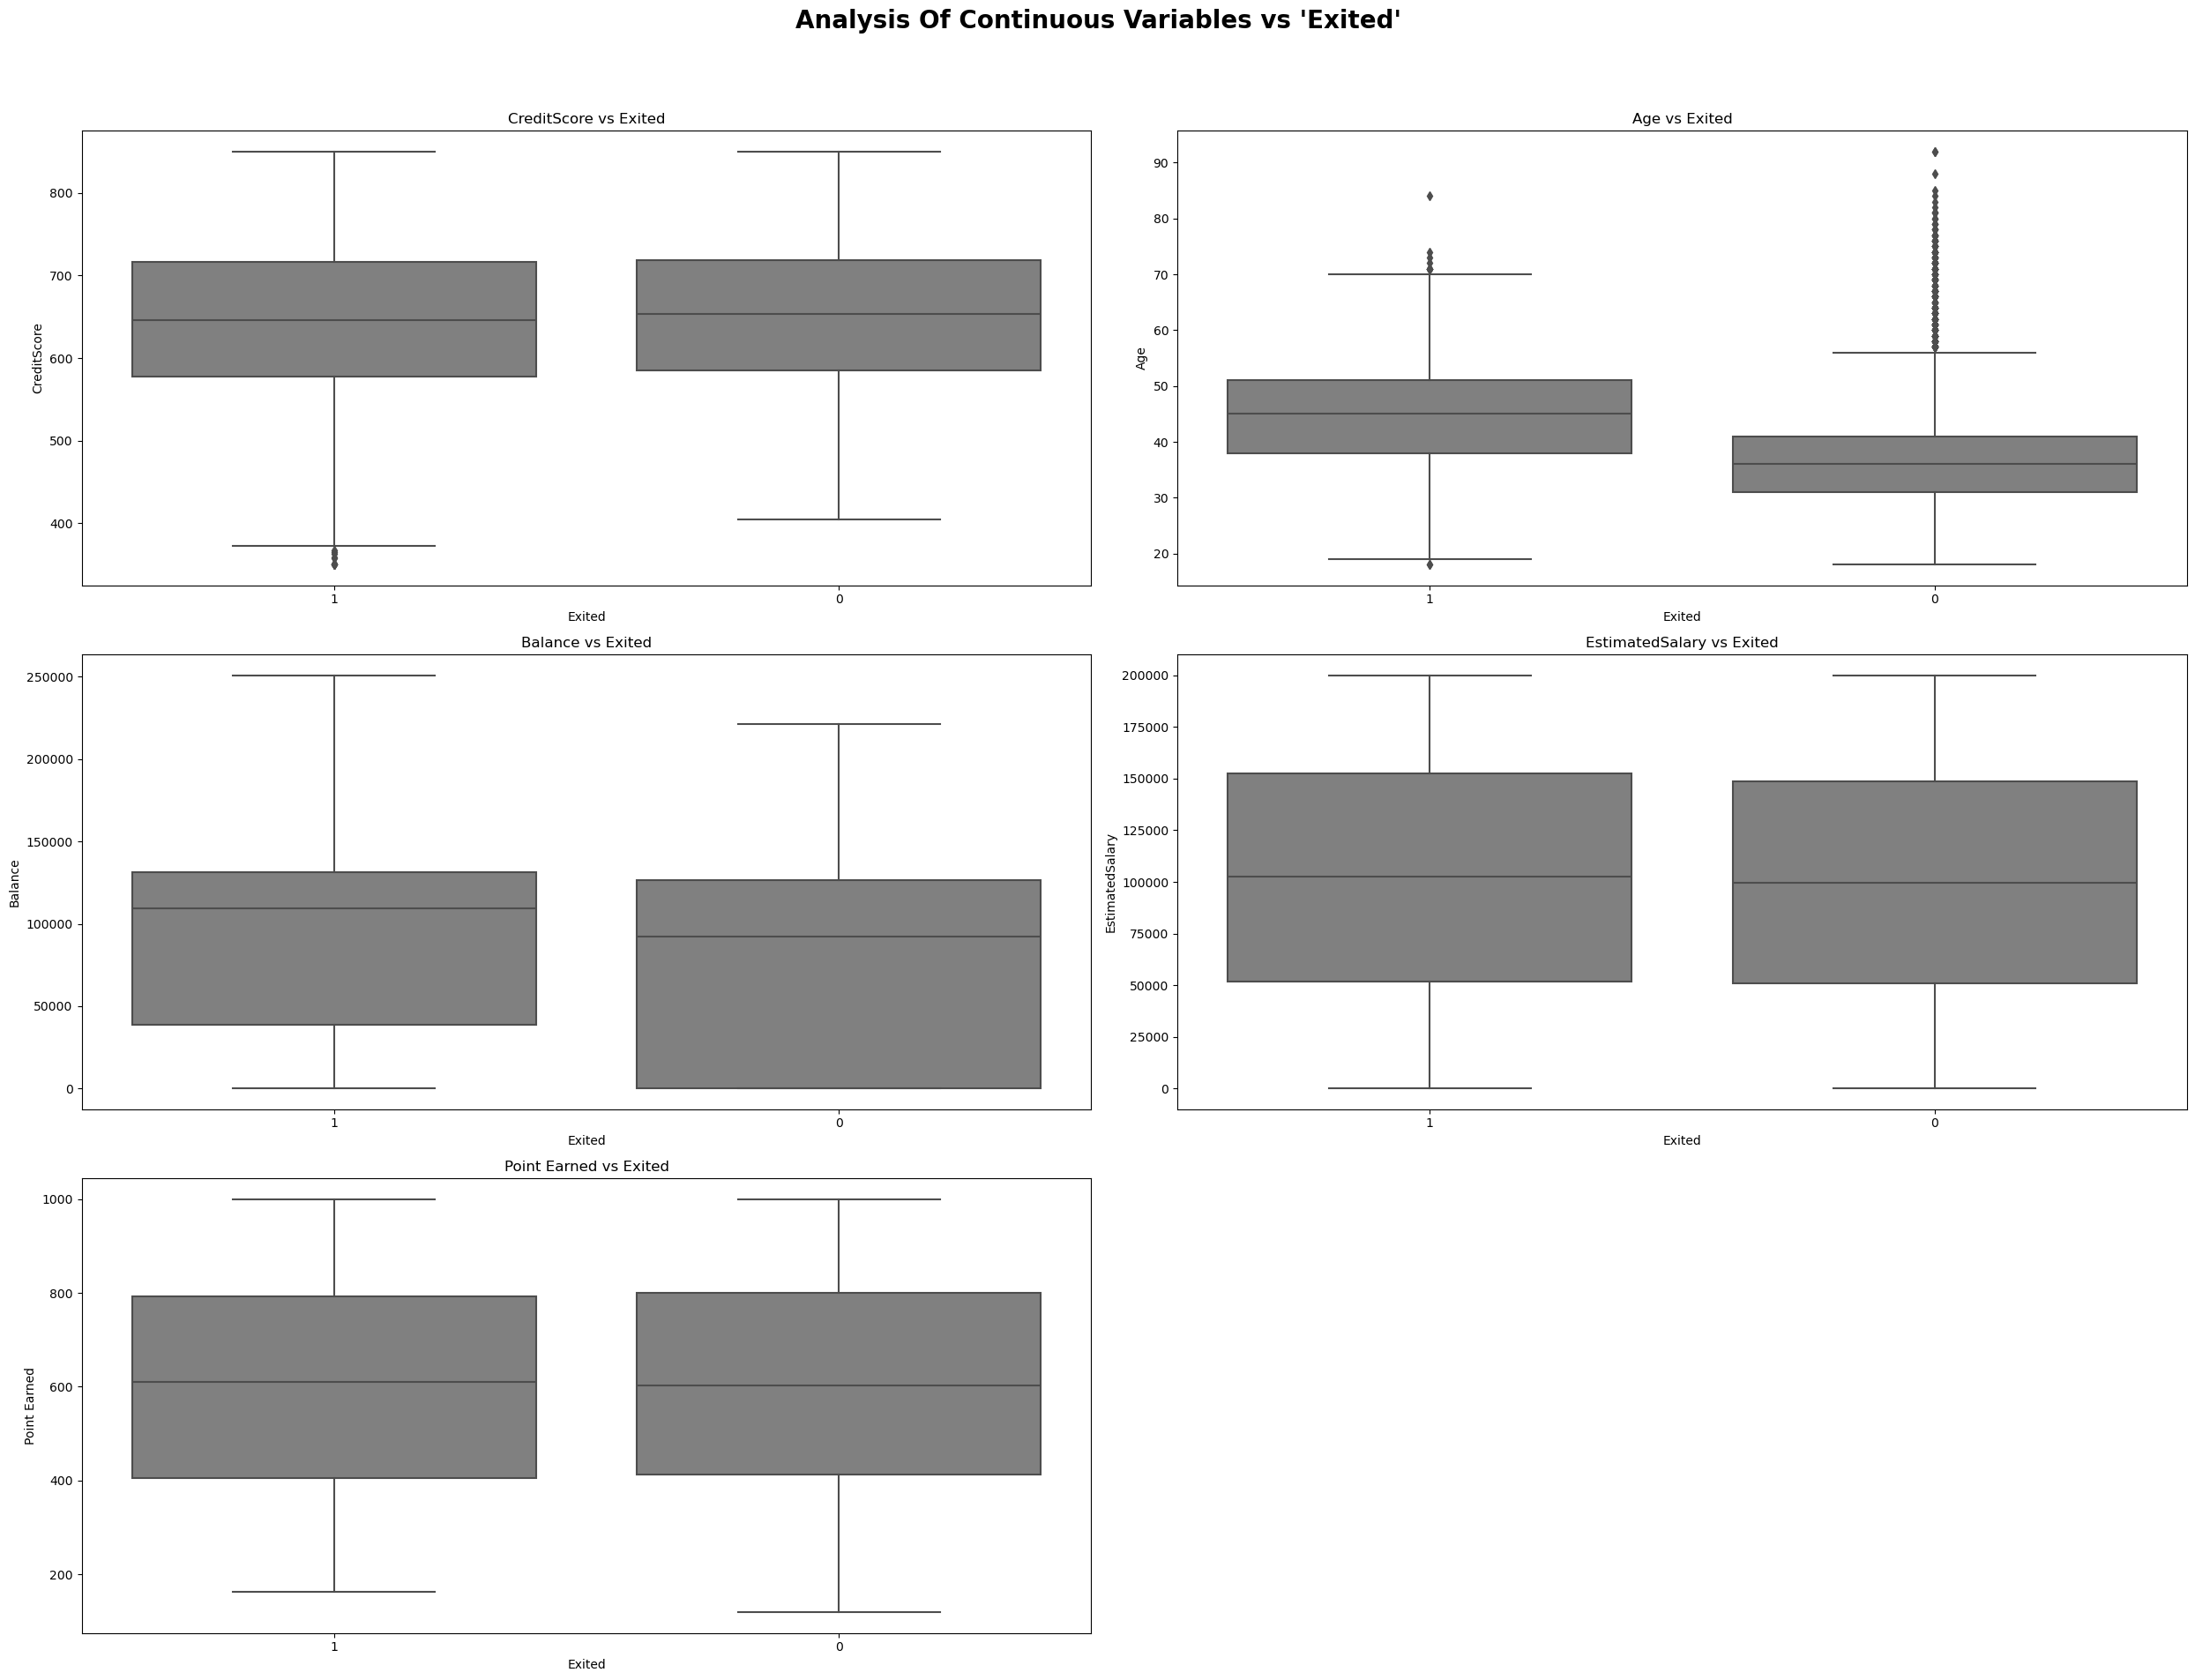

In [46]:
plt.figure(figsize=(25, 20))
plt.suptitle("Analysis Of Continuous Variables vs 'Exited'", fontweight="bold", fontsize=20)

plt.subplot(3, 2, 1)
sns.boxplot(x="Exited", y="CreditScore", data=df, color='grey')
plt.title("CreditScore vs Exited")

plt.subplot(3, 2, 2)
sns.boxplot(x="Exited", y="Age", data=df, color='grey')
plt.title("Age vs Exited")

plt.subplot(3, 2, 3)
sns.boxplot(x="Exited", y="Balance", data=df, color='grey')
plt.title("Balance vs Exited")

plt.subplot(3, 2, 4)
sns.boxplot(x="Exited", y="EstimatedSalary", data=df, color='grey')
plt.title("EstimatedSalary vs Exited")

plt.subplot(3, 2, 5)
sns.boxplot(x="Exited", y="Point Earned", data=df, color='grey')
plt.title("Point Earned vs Exited")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

COMMENTS: All looks normal, except the Age variable. Older customers are more likely to exit (median also higher)